# **Data Science Heart disease project**
# **mk04339**
# **as04345**

---



## ***Preprocessing***

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import  metrics
import missingno as msno

### ***Reading csv***

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#df.dtypes
df.isnull().sum(axis = 0)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Replacing all null values with the average of the corresponding continous-valued columns.**

In [6]:
countinous_columns = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for column in countinous_columns:
  df[column] = df[column].replace(np.nan, (df[column].mean()))

bp_meds_mean = df['BPMeds'].mean()
if bp_meds_mean < 0.5:
  df['BPMeds'] = df['BPMeds'].replace(np.nan, 0)
else:
  df['BPMeds'] = df['BPMeds'].replace(np.nan, 1)

#df.isnull().sum(axis = 0)

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Removing outliers from BMI**

In [8]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = df.loc[(df['BMI'] > fence_low) & (df['BMI'] < fence_high)]

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## ***Exploratory data analysis***

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

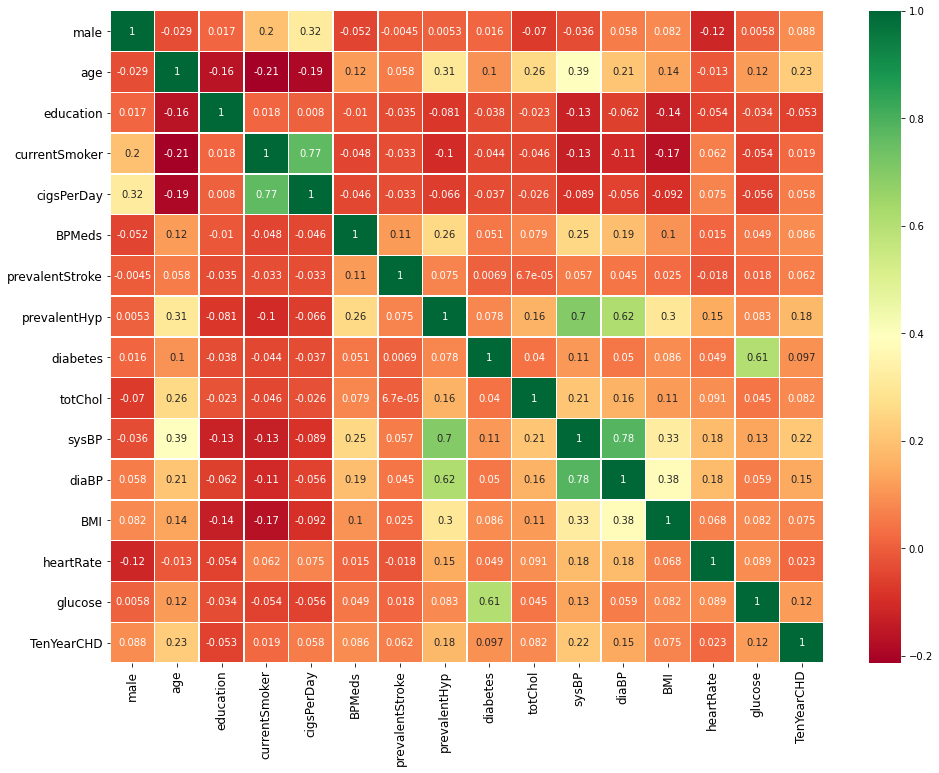

In [10]:
plt.figure(figsize=(16,12))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue') 
sns.heatmap(df.corr(),annot=True, linewidth=0.5, cmap=color)
plt.xticks(size=12)
plt.yticks(size=12)

In [11]:
df.sample(n=4)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4196,0,46,1.0,0,0.0,0.0,0,0,0,222.0,116.0,80.0,24.62,75.0,87.0,0
977,1,39,1.0,0,0.0,0.0,0,0,0,160.0,124.0,90.0,26.82,50.0,67.0,0
1724,0,39,2.0,1,20.0,0.0,0,0,0,247.0,122.0,70.0,18.70,70.0,65.0,0
954,0,58,4.0,0,0.0,0.0,0,1,0,268.0,151.0,98.0,20.34,72.0,60.0,0


***Female-only Heatmap***

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

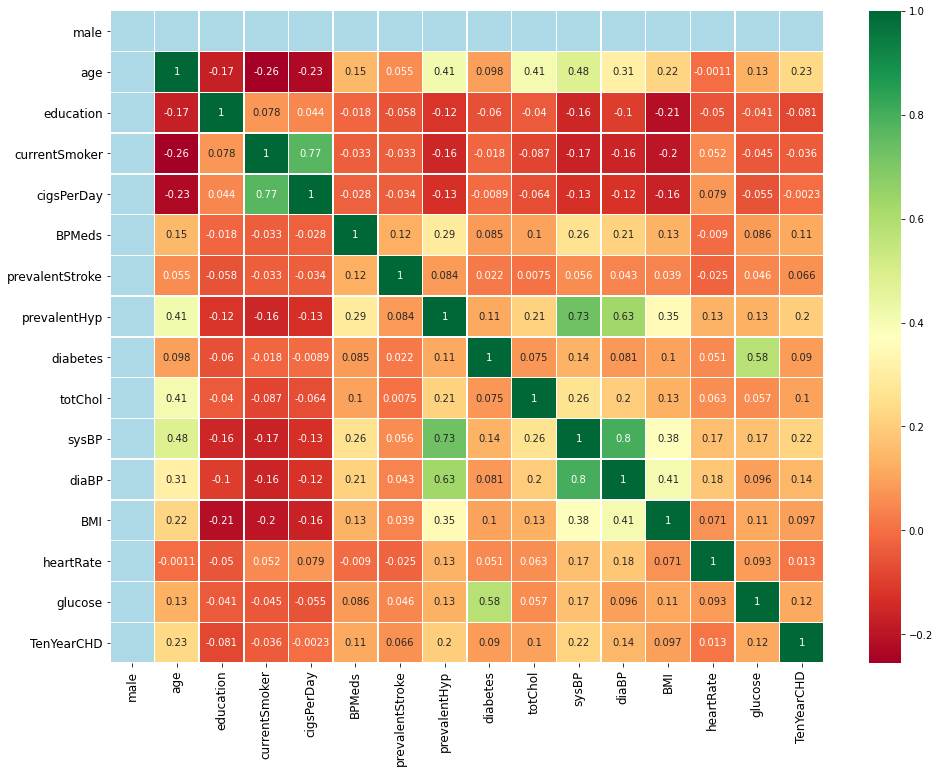

In [12]:
df_female = df[df['male'] == 0]
df_female.sample(n=4)

plt.figure(figsize=(16,12))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue') 
sns.heatmap(df_female.corr(),annot=True, linewidth=0.5, cmap=color)
plt.xticks(size=12)
plt.yticks(size=12)

***Male-only Heatmap***

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

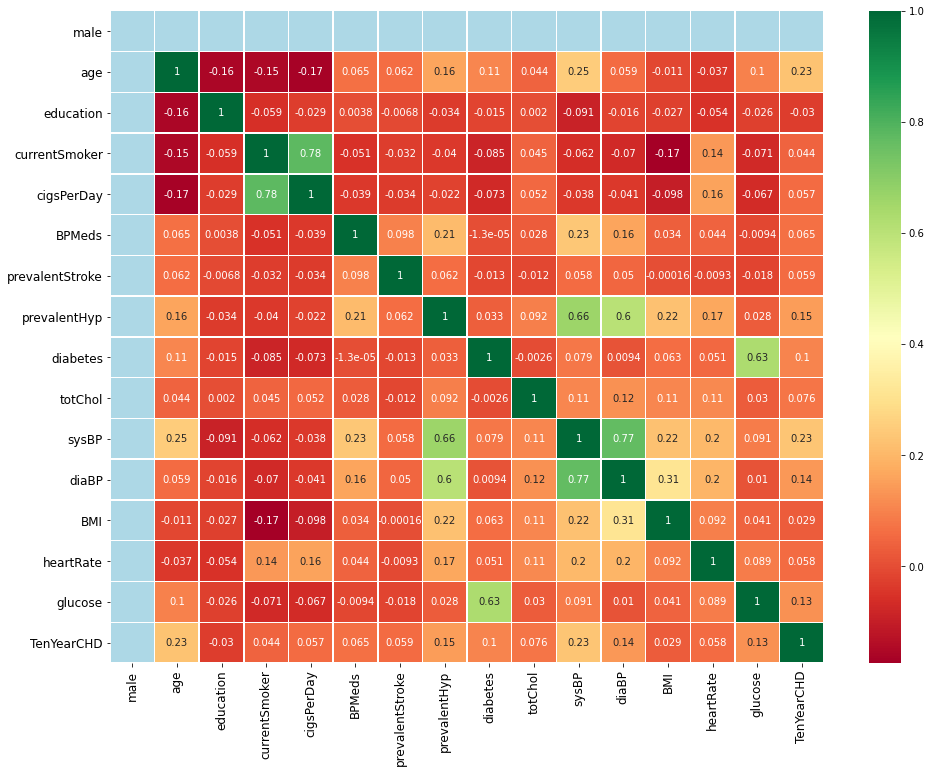

In [13]:
df_male = df[df['male'] == 1]

plt.figure(figsize=(16,12))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue') 
sns.heatmap(df_male.corr(),annot=True, linewidth=0.5, cmap=color)
plt.xticks(size=12)
plt.yticks(size=12)

### ***Cigarette and Education relationship***

(array([ 6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]),
 <a list of 11 Text major ticklabel objects>)

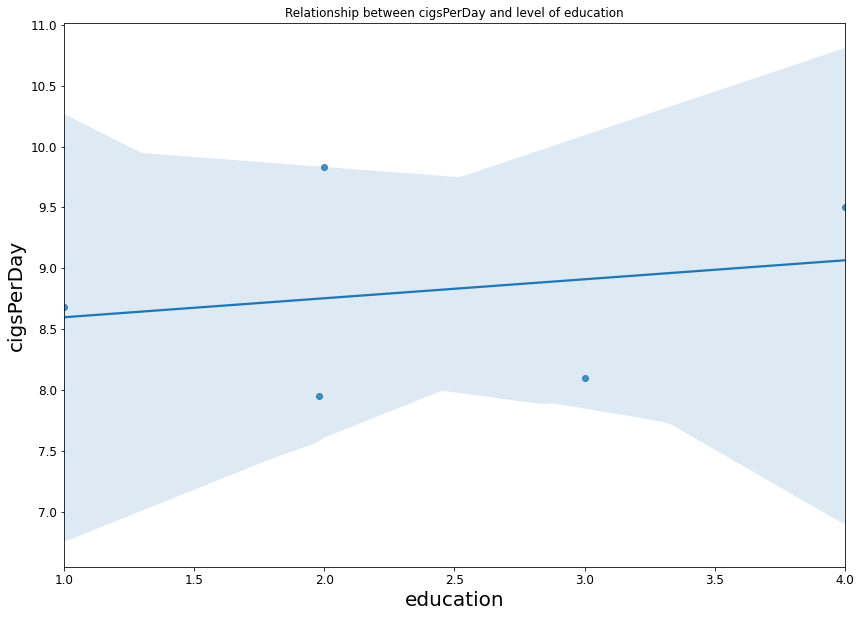

In [14]:
edu_cig_rel = df.groupby("education", as_index=False).cigsPerDay.mean()
plt.figure(figsize=(14,10))
sns.regplot(x=edu_cig_rel["education"], y=edu_cig_rel["cigsPerDay"])
plt.title("Relationship between cigsPerDay and level of education")
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### ***EDA with respect to age.***

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

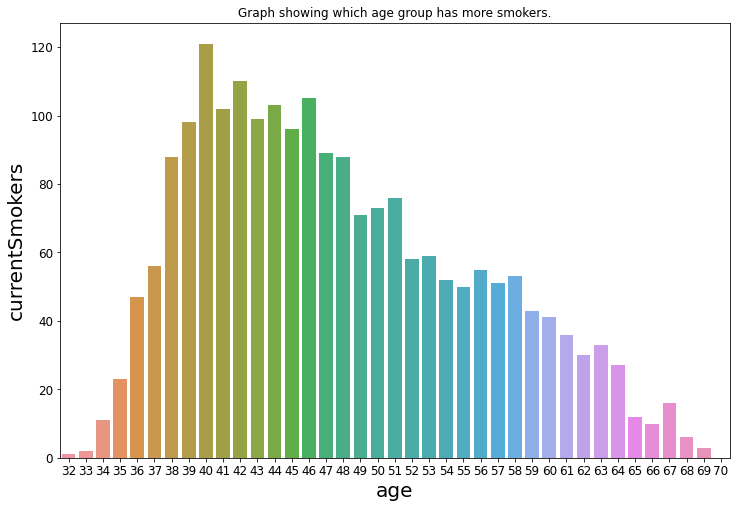

In [15]:
age_sig = df.groupby("age",as_index=False).currentSmoker.sum()
plt.figure(figsize=(12,8))
sns.barplot(x=age_sig["age"], y=age_sig["currentSmoker"])
plt.title("Graph showing which age group has more smokers.")
plt.xlabel("age", size=20)
plt.ylabel("currentSmokers", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

**Age group between mid thirties mid fifties have more smokers.**

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

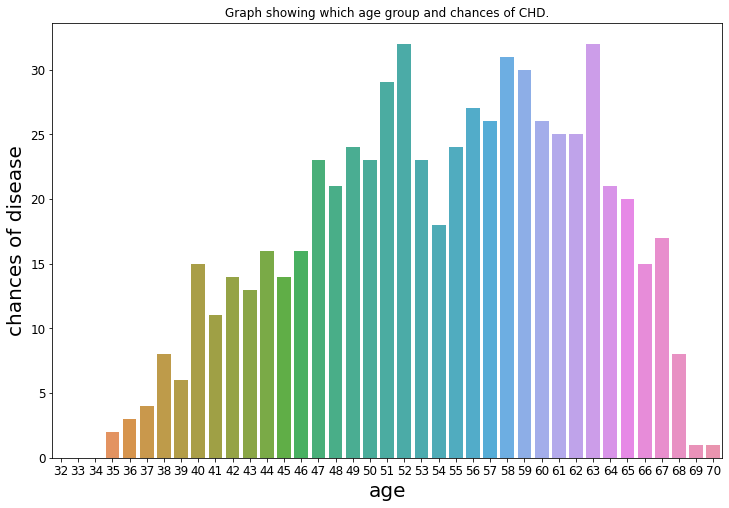

In [16]:
#a = df[(df['age'] >= 35) & (df['age'] <= 55)]
#b = df[(df['age'] < 35) & (df['age'] > 55)]

c = df.groupby("age",as_index=False).TenYearCHD.sum()
plt.figure(figsize=(12,8))
sns.barplot(x=c["age"], y=c["TenYearCHD"])
plt.title("Graph showing which age group and chances of CHD.")
plt.xlabel("age", size=20)
plt.ylabel("chances of disease", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

**More cigarattes per day results in a higher chance of CHD.**

**Age-Diabetes** 

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 <a list of 7 Text major ticklabel objects>)

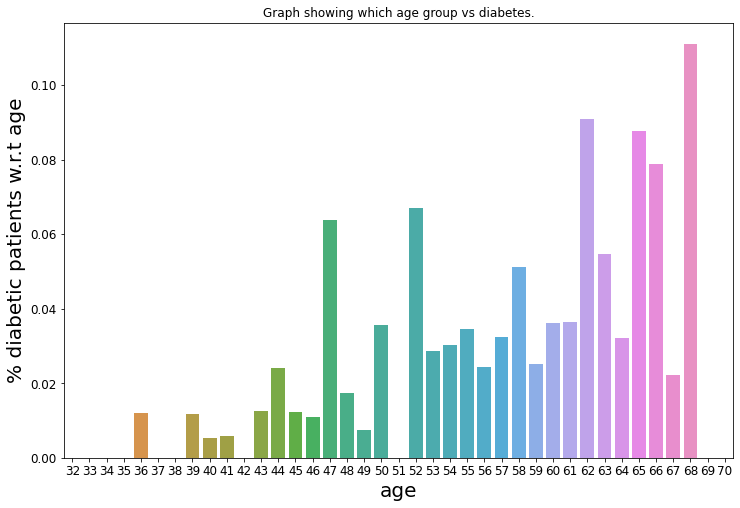

In [17]:
c = df.groupby("age",as_index=False).diabetes.mean()
plt.figure(figsize=(12,8))
sns.barplot(x=c["age"], y=c["diabetes"])
plt.title("Graph showing which age group vs diabetes.")
plt.xlabel("age", size=20)
plt.ylabel("% diabetic patients w.r.t age", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

***Age-Medical conditions***

(array([ 50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.]),
 <a list of 10 Text major ticklabel objects>)

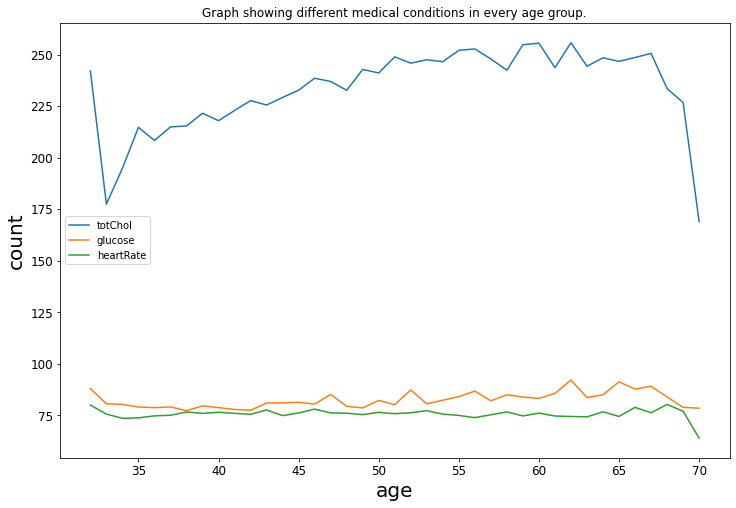

In [18]:
graph_4 = df.groupby("age").totChol.mean()
graph_5 = df.groupby("age").glucose.mean()
graph_6 = df.groupby("age").heartRate.mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=graph_4, label="totChol")
sns.lineplot(data=graph_5, label="glucose")
sns.lineplot(data=graph_6, label="heartRate")
plt.title("Graph showing different medical conditions in every age group.")
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### ***EDA with respect to gender.***

No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7fdfb29e3ac8>,
 [Text(-0.24261466625706887, 1.0729110511673237, 'Female'),
  Text(0.24261456580388516, -1.0729110738825434, 'Male')],
 [Text(-0.13233527250385574, 0.585224209727631, '57.08'),
  Text(0.13233521771121007, -0.5852242221177509, '42.92')])

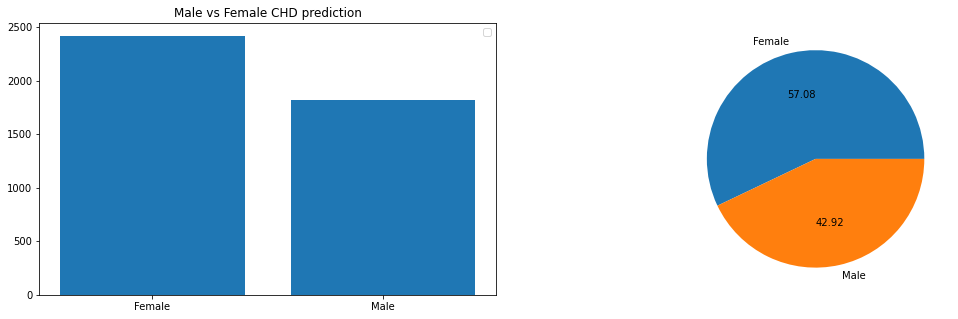

In [19]:
# male = df[(df['male'] == 1)]
# female = df[(df['male'] == 0)]
ratio = []
ratio_gen = ['Female', 'Male']
gender = df.groupby("male", as_index=False).TenYearCHD.count()
gender.sample(n=2)
for i in gender['TenYearCHD']:
  ratio.append(i)
f, ax = plt.subplots(figsize=(18,5))
plt.subplot(121)
plt.title("Male vs Female CHD prediction")
plt.bar(ratio_gen, ratio)
plt.legend()
plt.subplot(122)
plt.pie(ratio, labels = ratio_gen, autopct='%.2f') 

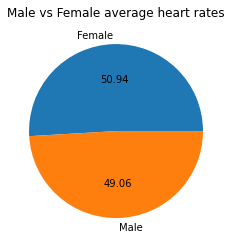

In [20]:
gen_hr = df.groupby("male", as_index=False).heartRate.mean()
gen_hr.head(2)
names = ['Female', 'Male']
tot = []
for i in gen_hr['heartRate']:
  tot.append(i)
plt.pie(tot, labels = names, autopct='%.2f')
plt.title("Male vs Female average heart rates") 
plt.show()

[2419, 1819]


Text(0, 0.5, 'Count')

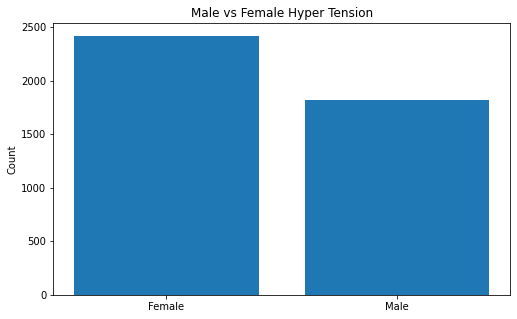

In [21]:
gen_hype = df.groupby("male", as_index=False).prevalentHyp.count()
gen_hype.head(2)
print(list(gen_hype['prevalentHyp']))
f, ax = plt.subplots(figsize=(18,5))
plt.subplot(121)
plt.title("Male vs Female Hyper Tension")
plt.bar(names, list(gen_hype['prevalentHyp']))
plt.ylabel('Count')

## ***Other Trends***

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

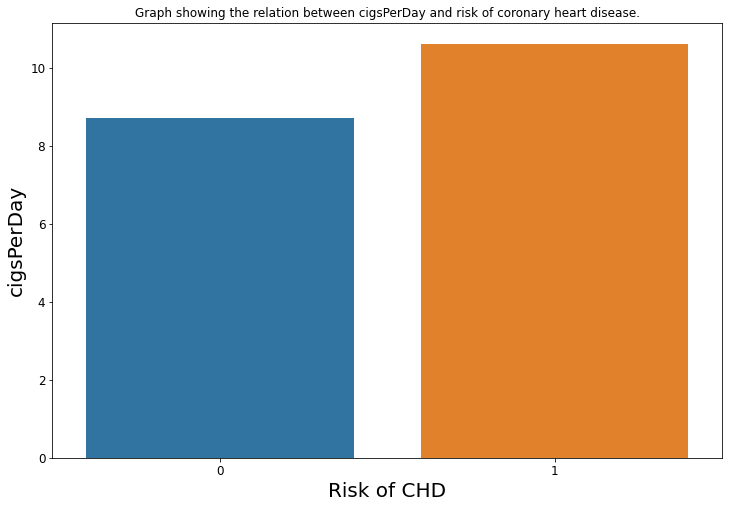

In [22]:
cigs = df.groupby("TenYearCHD", as_index=False).cigsPerDay.mean()
plt.figure(figsize=(12,8))
sns.barplot(x=cigs["TenYearCHD"], y=cigs["cigsPerDay"])
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.")
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 7 Text major ticklabel objects>)

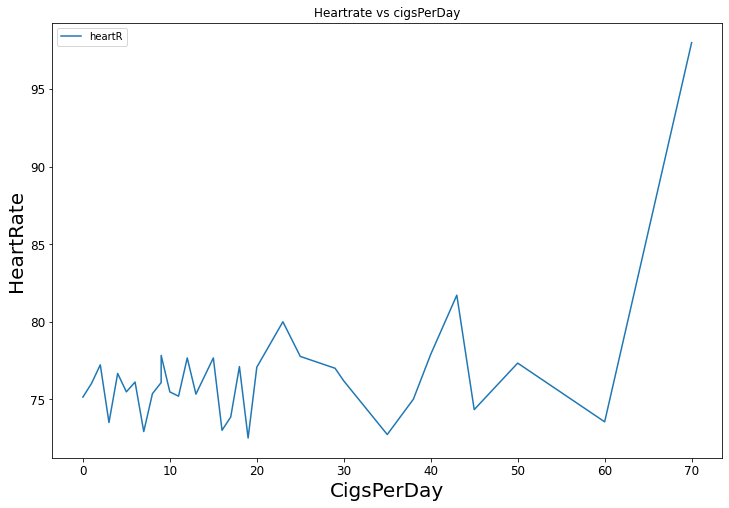

In [23]:
smoke_hr = df.groupby("cigsPerDay", as_index=False).heartRate.mean()
smoke_hr.head(30)
per_day = list(smoke_hr['cigsPerDay'])
hr = list(smoke_hr['heartRate'])
plt.figure(figsize=(12,8))
sns.lineplot(x=per_day, y=hr, label="heartR")
plt.title("Heartrate vs cigsPerDay")
plt.xlabel("CigsPerDay", size=20)
plt.ylabel("HeartRate", size=20)
plt.xticks(size=12)
plt.yticks(size=12) 

In [24]:
df.sample(n=4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4131,1,57,2.0,1,20.0,0.0,0,0,0,210.0,120.0,77.5,27.14,77.0,71.0,0
1909,1,42,3.0,1,20.0,0.0,0,0,0,220.0,119.0,73.5,23.31,67.0,63.0,0
1995,0,50,2.0,0,0.0,1.0,0,1,0,241.0,132.0,85.0,23.81,55.0,84.0,0
35,1,37,2.0,0,0.0,0.0,0,1,0,225.0,124.5,92.5,38.53,95.0,83.0,0


[0.24242424 0.34343434 0.31313131 ... 0.28282828 0.34343434 0.51515152]


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 7 Text major ticklabel objects>)

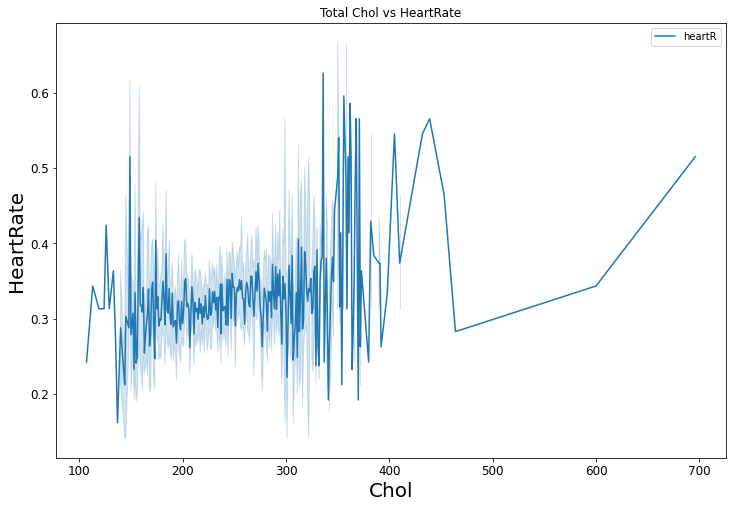

In [25]:
chol_hr = df.sort_values(by=['totChol'])
chol_hr.head(4)
min_max_scaler = preprocessing.MinMaxScaler()
x = chol_hr[['heartRate']].values
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = np.array(x_scaled)
x_scaled = x_scaled.flatten()
print(x_scaled)


plt.figure(figsize=(12,8))
sns.lineplot(x=chol_hr['totChol'], y = x_scaled, label="heartR")
plt.title("Total Chol vs HeartRate")
plt.xlabel("Chol", size=20)
plt.ylabel("HeartRate", size=20)
plt.xticks(size=12)
plt.yticks(size=12) 

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

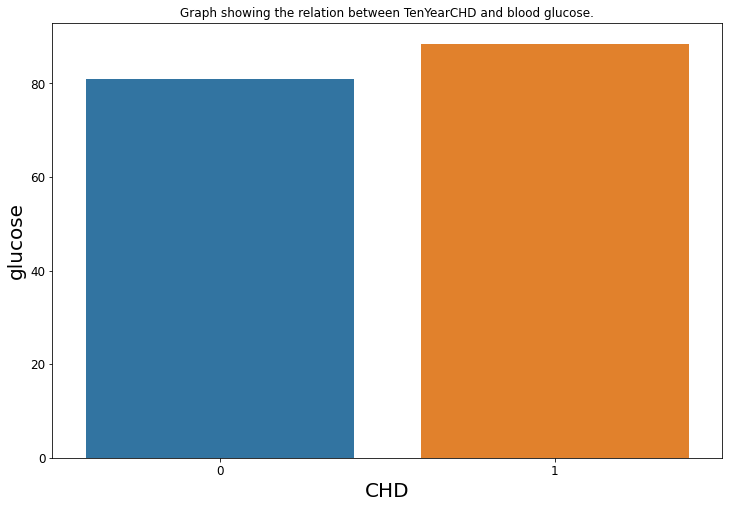

In [26]:
chd_glucose = df.groupby("TenYearCHD", as_index=False).glucose.mean()
chd_glucose.head(5)
plt.figure(figsize=(12,8))
sns.barplot(x=chd_glucose["TenYearCHD"], y=chd_glucose["glucose"])
plt.title("Graph showing the relation between TenYearCHD and blood glucose.")
plt.xlabel("CHD", size=20)
plt.ylabel("glucose", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5]),
 <a list of 10 Text major ticklabel objects>)

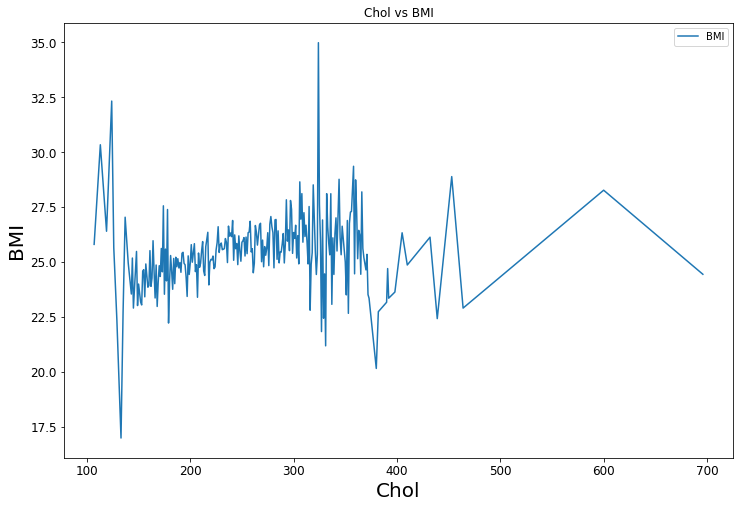

In [27]:
chol_BMI = df_out.groupby("totChol", as_index=False).BMI.mean()
chol_BMI.head(5)
age = list(chol_BMI['totChol'])
bmi = list(chol_BMI['BMI'])
plt.figure(figsize=(12,8))
sns.lineplot(x=age, y=bmi, label="BMI")
plt.title("Chol vs BMI")
plt.xlabel("Chol", size=20)
plt.ylabel("BMI", size=20)
plt.xticks(size=12)
plt.yticks(size=12) 

(array([100., 120., 140., 160., 180., 200., 220.]),
 <a list of 7 Text major ticklabel objects>)

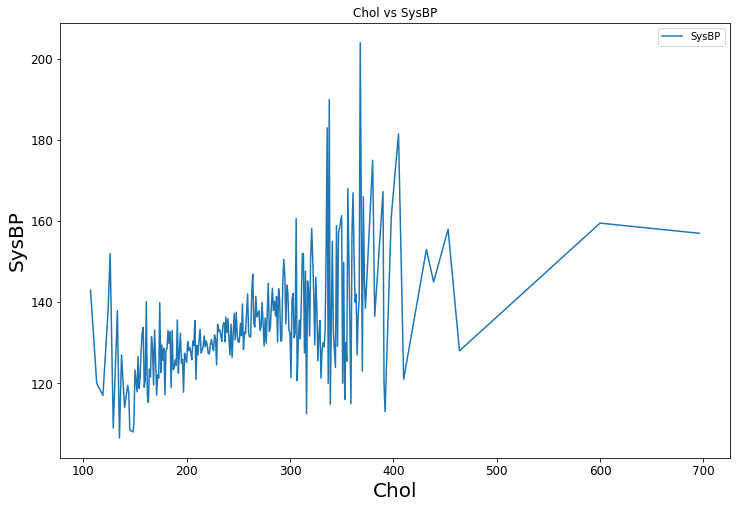

In [28]:
chol_bp = df_out.groupby("totChol", as_index=False).sysBP.mean()
chol_bp.head(5)
age = list(chol_bp['totChol'])
bmi = list(chol_bp['sysBP'])
plt.figure(figsize=(12,8))
sns.lineplot(x=age, y=bmi, label="SysBP")
plt.title("Chol vs SysBP")
plt.xlabel("Chol", size=20)
plt.ylabel("SysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12) 

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

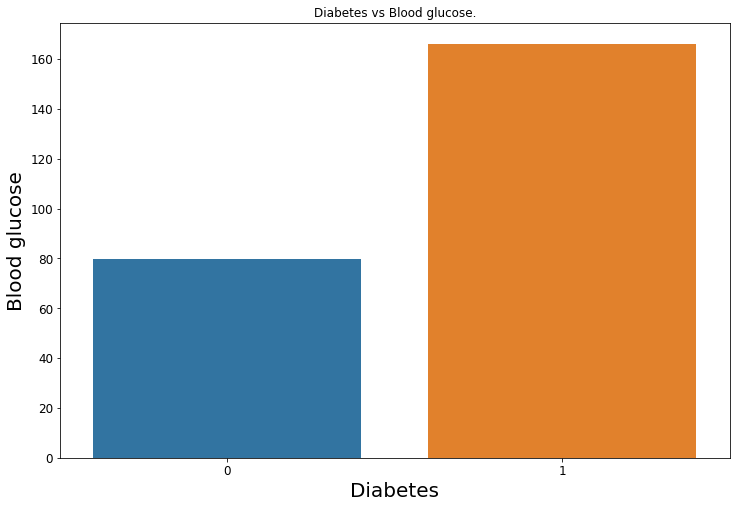

In [29]:
diab_gluc = df_out.groupby("diabetes", as_index=False).glucose.mean()
diab_gluc.head(5)
plt.figure(figsize=(12,8))
sns.barplot(x=diab_gluc["diabetes"], y=diab_gluc["glucose"])
plt.title("Diabetes vs Blood glucose.")
plt.xlabel("Diabetes", size=20)
plt.ylabel("Blood glucose", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

# ***Model Fitting***

***Splitting into Train and Test data***

In [30]:
y = df["TenYearCHD"]
X = df.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

***Min-Max Scaling***

In [31]:
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [32]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[1070    4]
 [ 187   11]]


Accuracy of Logistic Regression: 84.98427672955975 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1074
           1       0.73      0.06      0.10       198

    accuracy                           0.85      1272
   macro avg       0.79      0.53      0.51      1272
weighted avg       0.83      0.85      0.79      1272



### **Naive Bayes**

In [33]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[1004   70]
 [ 155   43]]


Accuracy of Naive Bayes model: 82.31132075471697 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1074
           1       0.38      0.22      0.28       198

    accuracy                           0.82      1272
   macro avg       0.62      0.58      0.59      1272
weighted avg       0.79      0.82      0.80      1272



### **Decision Tree**

In [58]:
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'gini',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[1051   23]
 [ 183   15]]


Accuracy of DecisionTreeClassifier: 83.80503144654088 

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1074
           1       0.39      0.08      0.13       198

    accuracy                           0.84      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.78      0.84      0.79      1272



### **K-Neighbours**

In [35]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[1070    4]
 [ 194    4]]


Accuracy of K-NeighborsClassifier: 84.43396226415094 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1074
           1       0.50      0.02      0.04       198

    accuracy                           0.84      1272
   macro avg       0.67      0.51      0.48      1272
weighted avg       0.79      0.84      0.78      1272



# ***Ensembling***

### **Bagging**

In [36]:
clf = BaggingClassifier(n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
clf_conf_matrix = confusion_matrix(y_test, clf_predicted)
clf_acc_score = accuracy_score(y_test, clf_predicted)
print("confussion matrix")
print(clf_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("Accuracy of Bagging using Decision tree :",clf_acc_score*100,'\n')

confussion matrix
[[1057   17]
 [ 176   22]]


Accuracy of DecisionTreeClassifier: 83.72641509433963 

Accuracy of Bagging using Decision tree : 84.82704402515722 



In [37]:
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
clf_conf_matrix = confusion_matrix(y_test, clf_predicted)
clf_acc_score = accuracy_score(y_test, clf_predicted)
print("confussion matrix")
print(clf_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("Accuracy of Bagging using Logistic Regression :",clf_acc_score*100,'\n')

confussion matrix
[[1070    4]
 [ 188   10]]


Accuracy of Logistic Regression: 84.98427672955975 

Accuracy of Bagging using Logistic Regression : 84.90566037735849 



In [38]:
clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
clf_conf_matrix = confusion_matrix(y_test, clf_predicted)
clf_acc_score = accuracy_score(y_test, clf_predicted)
print("confussion matrix")
print(clf_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("Accuracy of Bagging using Naive Bayes Model :",clf_acc_score*100,'\n')

confussion matrix
[[1003   71]
 [ 155   43]]


Accuracy of Naive Bayes model: 82.31132075471697 

Accuracy of Bagging using Naive Bayes Model : 82.23270440251572 



In [39]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
clf_conf_matrix = confusion_matrix(y_test, clf_predicted)
clf_acc_score = accuracy_score(y_test, clf_predicted)
print("confussion matrix")
print(clf_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("Accuracy of Bagging using Naive Bayes Model :",clf_acc_score*100,'\n')

confussion matrix
[[1048   26]
 [ 182   16]]


Accuracy of K-NeighborsClassifier: 84.43396226415094 

Accuracy of Bagging using Naive Bayes Model : 83.64779874213836 



***Random Forest***

In [56]:
rf = RandomForestClassifier(n_estimators=100)
rf_scores = cross_val_score(rf,X_train, y_train, cv=5)
print("Accuracy of Bagging using Random Forest :",rf_scores.mean()*100,'\n')

Accuracy of Bagging using Random Forest : 85.06401848728999 



## **Boosting**

***ADA Boosting***

In [41]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_scores = cross_val_score(ada_clf,X_train, y_train, cv=5)
print("Accuracy of Boosting, ADA Boosting :",ada_scores.mean()*100,'\n')

Accuracy of Boosting, ADA Boosting : 84.12000840331363 



***Gradient Tree Boosting***

In [59]:
gt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gt_scores = cross_val_score(gt_clf,X_train, y_train, cv=5)
print("Accuracy of Boosting, Gradient tree Boosting :",gt_scores.mean()*100,'\n')

Accuracy of Boosting, Gradient tree Boosting : 84.1539055535683 



***XGBoost***

In [60]:
xg_model = XGBClassifier()
xg_scores = cross_val_score(xg_model,X_train, y_train, cv=5)
print("Accuracy of Boosting, XGBoost :",xg_scores.mean()*100,'\n')

Accuracy of Boosting, XGBoost : 84.86194150612363 



### **Selecting K best features**

***Logistic Regression***

In [44]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_new, y,test_size=0.3)
logregg = LogisticRegression(max_iter=10000)
logregg.fit(X_trainn, y_trainn)
y_predd = logregg.predict(X_testt)
lr_kbest = metrics.accuracy_score(y_predd, y_testt)
print("Accuracy of logistic regression classifier after feature ranking:  = ", metrics.accuracy_score(y_predd, y_testt)*100)

Accuracy of logistic regression classifier after feature ranking:  =  0.8545597484276729


***Naive Bayes***

In [61]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_new, y,test_size=0.3)
logregg = GaussianNB()
logregg.fit(X_trainn, y_trainn)
y_predd = logregg.predict(X_testt)
nb_kbest = metrics.accuracy_score(y_predd, y_testt)
print("Accuracy of logistic regression classifier after feature ranking:  = ", metrics.accuracy_score(y_predd, y_testt)*100)

Accuracy of logistic regression classifier after feature ranking:  =  82.15408805031447


***Decision Tree***

In [62]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_new, y,test_size=0.3)
logregg = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
logregg.fit(X_trainn, y_trainn)
y_predd = logregg.predict(X_testt)
dt_kbest = metrics.accuracy_score(y_predd, y_testt)
print("Accuracy of logistic regression classifier after feature ranking:  = ", metrics.accuracy_score(y_predd, y_testt)*100)

Accuracy of logistic regression classifier after feature ranking:  =  82.94025157232704


***K-Neighbours***

In [63]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_new, y,test_size=0.3)
logregg = KNeighborsClassifier(n_neighbors=10)
logregg.fit(X_trainn, y_trainn)
y_predd = logregg.predict(X_testt)
kn_kbest = metrics.accuracy_score(y_predd, y_testt)
print("Accuracy of logistic regression classifier after feature ranking:  = ", metrics.accuracy_score(y_predd, y_testt)*100)

Accuracy of logistic regression classifier after feature ranking:  =  85.37735849056604


In [57]:
model_analysis = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Gradient Tree Boost',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_scores.mean()*100,xg_scores.mean()*100,knn_acc_score*100,dt_acc_score*100]})
model_analysis

,Model,Accuracy
0,Logistic Regression,84.984277
1,Naive Bayes,82.311321
2,Random Forest,85.064018
3,Gradient Tree Boost,84.861942
4,K-Nearest Neighbour,84.433962
5,Decision Tree,83.726415
